# Projet numérique de Science des Données 2025

__Binôme numéro 71 -- BOSSIN Antoine et LAMBOTTE Martin__

## Introduction

Dans ce projet, il s'agira d'étudier un jeu de données concernant des femmes diabétiques enceintes. Le diabète constitue un facteur de risque pour le bon déroulé de la grossesse. Pour chacune de ces femmes, nous disposons de 7 variables :
* `Age` : l'âge en années
* `Tension systolique` : la tension systolique en mmHg
* `Tension diastolique` : la tension diastolique en mmHg
* `Glycémie` : glycémie post-prandiale en mmol/L
* `Température` : température en °C
* `FC au repos` : fréquence cardiaque au repos
* `Risque` : degré de risque obstétrique (0 : faible, 1 : moyen, 2 : élevé)


Ce projet comporte trois partie :
1. Une analyse exploratoire des données
2. La construction d'un classifieur binaire permettant de séparer les femmes dont la grossesse est à risque de celles dont elle ne l'est pas
3. La construction d'un classifieur multi-classe permettant de séparer les grossesses en trois classes : hautement à risque, moyennement à risque, faiblement à risque.

## Instructions 
* Former un binôme et l'inscrire dans Moodle.
* Renseigner le numéro de binôme et vos noms tout en haut de ce notebook à l'emplacement indiqué.
* Déposer ce notebook complété **au plus tard le 10 juillet 2025, 23h59** sur Moodle.

La présence aux séances dédiés au mini-projet (20/06 et 7/07) est **notée**. 

Les questions **1 à 14** peuvent être traitées dès la première séance. 
La question **15** peut être traitée après la PC4.
Les questions **16 à 30** peuvent être traitées à partir de la PC5.

Pour des raisons pédagogiques (voir la note à ce sujet), **l'usage d'assistants de code ou d'agents conversationnels tels que ChatGPT, Copilot, Claude, LeChat est prohibé. Leur utilisation sera sanctionnée.**

### Question 1 (1pt)

Les données ont été récoltées dans une région défavorisée du monde, où les populations sont très pauvres et peuvent difficilement consulter. Quel peut être l'intérêt de déléguer à un algorithme la prédiction du risque obstétrique ? Quelles peuvent être les dérives (sociales, éthiques, économiques, psychologiques) d'une telle pratique ?

Déléguer à un algorithme cette prédiction peut posséder un certain nombre d'intérêts en termes de santé publique : <br>
<ul>
    <li>Cela peut rendre accessible ce test s'il n'était pas connu ou reconnu par les autorités médicales du pays concerné, et le rendre plus abordable si le cout de la prédiction ne dépasse pas celui d'une consultation permettant cette même prédiction</li>
    <li>Cela peut permettre un gain de temps</li>
    <li>Cela peut permettre de s'affranchir de barrieres géographiques (éloignement) ou culturelles (tabou autour de la grossesse et des soins intimes) qui empêcheraient une femme enceinte d'avoir accès à un personnel médical agréé en capacité d'effectuer la prédiction</li>
</ul><br>
Cependant, les intérêts sont toujours relatifs à une population donnée : les points ci-dessus abordent les intérêts du point de vue de la santé publique. Selon les acteurs en jeu, cette solution technique de prédiction peut avoir d'autres intérêts : si par exemple c'est une entreprise privée qui propose cette solution, son intérêt économique entre nécessairement en ligne de compte et cet interêt pourrait alors même s'opposer à la bonne santé publique (vente de données personnelles ou leur communication à des régimes répressifs par exemple).  De maniere analogue, un Etat pourrait proposer cette solution pour masquer l'absence de reelles politiques publiques en faveur de la sante des femmes, ou bien l'utiliser à des fins de surveillance et de répréssion. <br> <br>

Les dérives d'une telle pratique de délégation sont nombreuses, et une question importante est celle de l'acteur qui met en oeuvre cette pratique : 
<ul>
<li>Est-ce une entreprise privée ? dans ce cas est-elle étrangere ou bien gérée par des locaux ? Par quels moyens l'entreprise parvient-elle à la rentabilité ?</li>
<li>Est-ce un Etat ? Dans ce cas le pouvoir est-il démocratiquement partagé ? Quels sont les organismes de surveillance citoyenne pour éviter les dérives de l'agence publique ?</li>
</ul>
<br> Ainsi, les questions sont nombreuses, d'autant que les données médicales peuvent être protégées par le secret, ou pas, selon la législation en vigueur. On peut ajouter que les données exigées pour la prédiction semblent demander un minimum d'examen médicaux et donc potentiellement une consultation médicale, ce qui annulerait une partie des intérêts précédement cités d'une telle délégation. Enfin, discuter avec un personnel médical lors d'une consultation peut comporter des aspects bénéfiques comme délétaires selon les compétences professionnelles du personnel médical, la culture, les tabou : discuter avec un être humain peut permettre une meilleure prise en charge tout comme une violence accrue par rapport à un test en ligne.
<br><br> En tous les cas, un ingénieur avec un minimum d'éthique et de possibilités de reconversion ne devrait pas contribuer à un tel projet sans être en capacité de répondre sérieusement aux interrogations précédemment décrites.

<!-- - Multifacteur ? 
- Médecin + précis ? Plus de caractéristiques
- Si on s'assure une très faible proportion de faux négatif ok ?
- Enjeux éthiques pour la gestion et la protection des données
- Voir un (h/H)omme ou une machine rapport psycho différent  -->


## Librairies usuelles

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

np.random.seed(19) 

## Chargement des données

Nous allons pour l'instant travailler avec le jeu de données d'entraînement `data/donnees_entrainement.csv` :

In [2]:
df_train = pd.read_csv('data/donnees_entrainement.csv')
df_train.head(5)

,Age,Tension systolique,Tension diastolique,Glycémie,Température,FC au repos,Risque
0,21.0,85.0,55.0,7.0,36.2,84.0,1
1,36.0,145.0,100.0,6.9,39.5,73.0,2
2,15.5,120.0,75.0,7.4,39.0,74.0,0
3,49.0,135.0,100.0,15.9,37.8,72.0,1
4,56.5,120.0,90.0,12.0,36.9,74.0,1


Commençons par en extraire deux arrays, `X_train` et `y_train`, contenant d'une part les variables décrivant les observations et d'autre part leurs étiquettes :

In [3]:
X_train = np.array(df_train.drop('Risque', axis=1))
y_train = np.array(df_train['Risque'], dtype='int')
print(X_train.shape)

(800, 6)


# 1. Exploration de données

## Distributions des variables

### Question 2 (1 pt)
Pour chaque variable, affichez un histogramme de sa distribution dans chacune des trois classes.

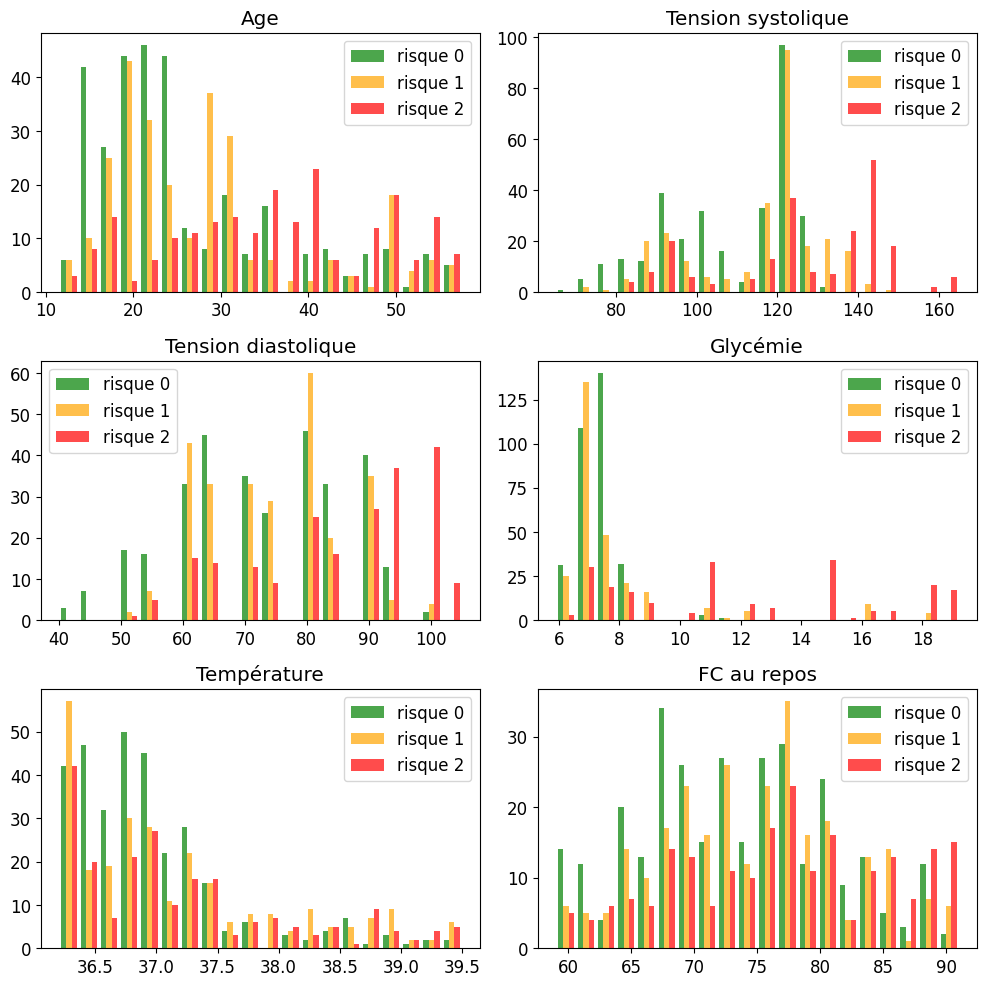

In [4]:
continuous_features = ['Age', 'Tension systolique', 'Tension diastolique', 'Glycémie','Température','FC au repos']
discrete_features = ['risque']
features = list(df_train.drop(columns=['Risque']).columns)
continuous_features_idx = [features.index(feat_name) for feat_name in continuous_features]
#Ici toutes les variables qu'on étudie sont continues

fig = plt.figure(figsize=(10, 10))

# Histogrammes pour les variables continues

for plot_idx in range(6):
    # créer une sous-figure (subplot) à la position (plot_idx+1) d'une grille 2x2
    ax = fig.add_subplot(3, 2, (plot_idx+1))
    
    serie0 = X_train[y_train == 0, plot_idx]
    serie1 = X_train[y_train == 1, plot_idx]
    serie2 = X_train[y_train == 2, plot_idx]
    # afficher l'histogramme de la variable feat_idx
    ax.hist([serie0, serie1, serie2], color=['green', 'orange', 'red'], label=['risque 0', 'risque 1', 'risque 2'], bins=20, alpha=0.7)
    ax.legend()
    
    # utiliser le nom de la variable comme titre pour chaque diagramme
    ax.set_title(features[plot_idx])
    
# espacement entre les subplots
fig.tight_layout(pad=1.0)

### Question 3 (1 pt)
Les valeurs prises par ces variables sont-elles surprenantes ? Cohérentes avec le degré de risque ?

Détaillons la situation par variable : 
- pour l'âge rien de surprenant puisque l'on s'attend à ce que le risque augmente avec l'âge (à partir de 35 ans une grossesse est considérée à risque)
- Pour la tension systolique et diastolique, on remarque que passé un seuil le risque est automatiquement supérieur à 0. Pour des tensions basses le risque est faible. Cela paraît cohérent : si le coeur doit fortement pomper il se fatigue vite et le risque augmente.
- Pour la glycémie même analyse passé les 10mmol/L les cas sont plus rares mais présentent un risque élevé.
- Il est difficile de faire une conclusion à partir de la température et de la FC au repos car les tendances sont les mêmes pour tous les risques

### Question 4 (1 pt)
Pensez-vous qu'il va être facile/difficile de prédire le risque de grossesse à risque en utilisant ces 6 variables ?

Malheureusement, mesurer toutes les variables dans la moyenne des observations connues n'implique pas forcément une absense de risque. En effet on peut seulement raisonner en termes de  probabilité et pour une même valeur mesurée l'on peut avoir trois niveau de risque différent. Cependant, en obervant les graphes ci-dessous, on peut tout de même faire l'hypothèse que la glycémie permet de distinguer un risque 0 des risques 1 et 2 en cas de valeur extrême, et de même pour la tension systolique dans une moindre mesure. Cependant, pour des valeurs qui ne sont pas extrêmes, la prédiction semble difficile.

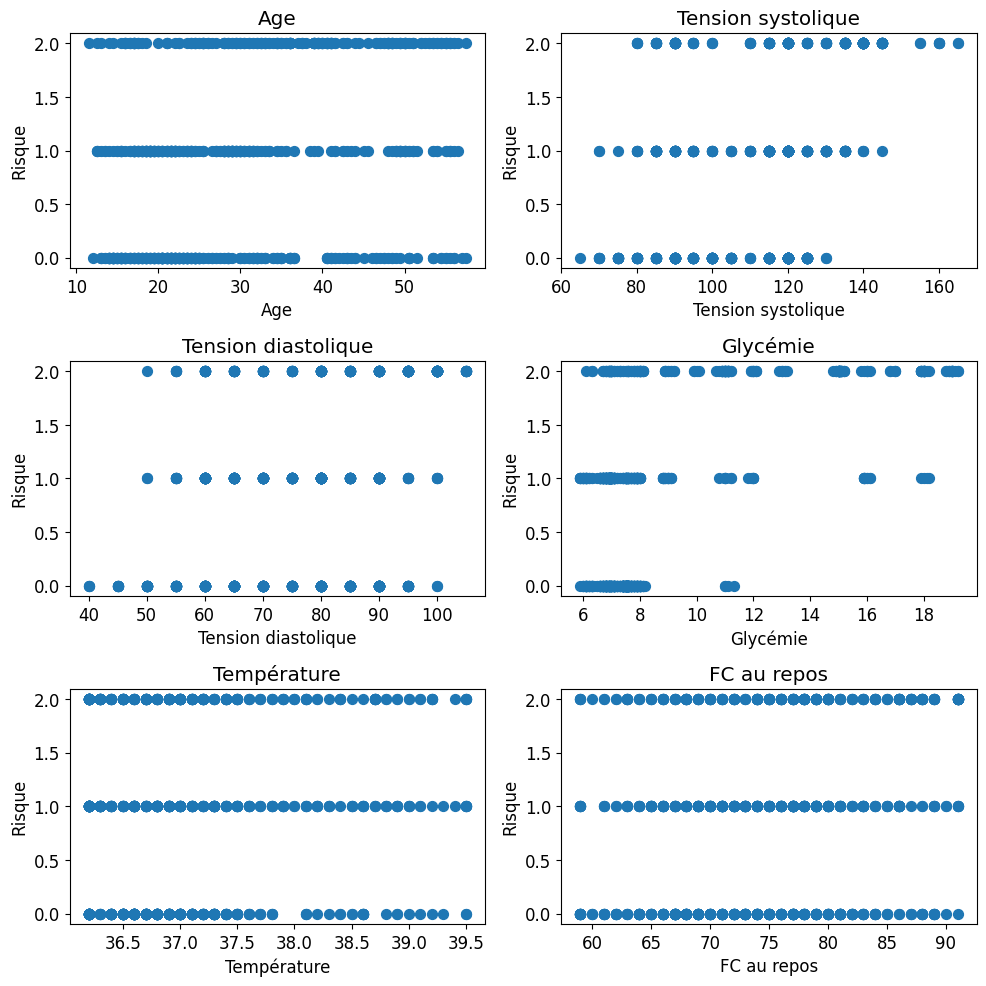

In [5]:
continuous_features = ['Age', 'Tension systolique', 'Tension diastolique', 'Glycémie','Température','FC au repos']
discrete_features = ['risque']
features = list(df_train.drop(columns=['Risque']).columns)
continuous_features_idx = [features.index(feat_name) for feat_name in continuous_features]
#Ici toutes les variables qu'on étudie sont continues

fig = plt.figure(figsize=(10, 10))

# Histogrammes pour les variables continues

for plot_idx in range(6):
    # créer une sous-figure (subplot) à la position (plot_idx+1) d'une grille 2x2
    ax = fig.add_subplot(3, 2, (plot_idx+1))
    ax.scatter(df_train[continuous_features[plot_idx]], df_train['Risque'], s=50)

    # # afficher l'histogramme de la variable feat_idx
    # ax.hist([serie0, serie1, serie2], color=['green', 'orange', 'red'], label=['risque 0', 'risque 1', 'risque 2'], bins=20, alpha=0.7)
    plt.xlabel(continuous_features[plot_idx])
    plt.ylabel('Risque')
    
    # utiliser le nom de la variable comme titre pour chaque diagramme
    ax.set_title(features[plot_idx])
    
# espacement entre les subplots
fig.tight_layout(pad=1.0)

## Réduction de dimension

Indépendamment de votre réponse à la question précédente, nous allons procéder à deux tentatives de réduction de dimension.

### Question 5 (1 pt)
Utilisez la décomposition en composantes principales de `X_train` pour visualiser les données en deux dimensions.

In [6]:
# Standardisation des données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_scaled = std_scale.transform(X_train)

<class 'sklearn.decomposition._pca.PCA'>


Text(0, 0.5, 'Proportion de variance expliquée')

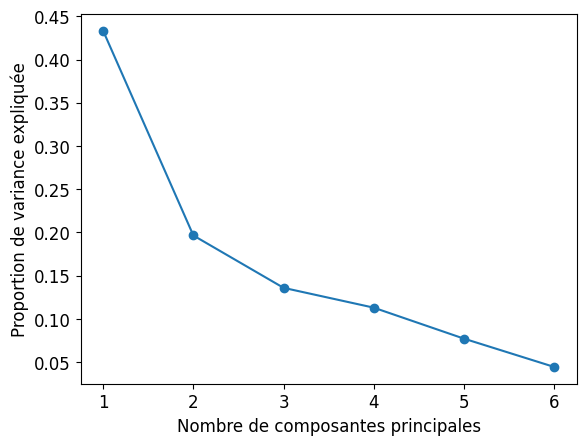

In [7]:
from sklearn import decomposition
# Instanciation d'un objet PCA pour 6 composantes principales
pca = decomposition.PCA(n_components=6)
print(type(pca))
# On passe maintenant les données standardisées à cet objet
# C'est ici que se font les calculs
pca.fit(X_scaled)
plt.plot(np.arange(1, 7), pca.explained_variance_ratio_, marker='o')

plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")

Text(0.5, 1.0, 'Proportion cumulative de variance expliquée')

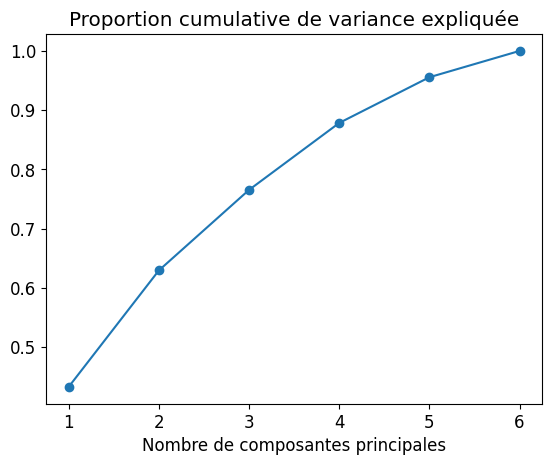

In [8]:
np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, 7), np.cumsum(pca.explained_variance_ratio_), marker='o')

plt.xlabel("Nombre de composantes principales")
plt.title("Proportion cumulative de variance expliquée")

Pour visualiser les données en deux dimensions, on projette les données sur les deux premières composantes principales, qui expliquent environ 63% de la variance.

Text(0, 0.5, 'PC 2')

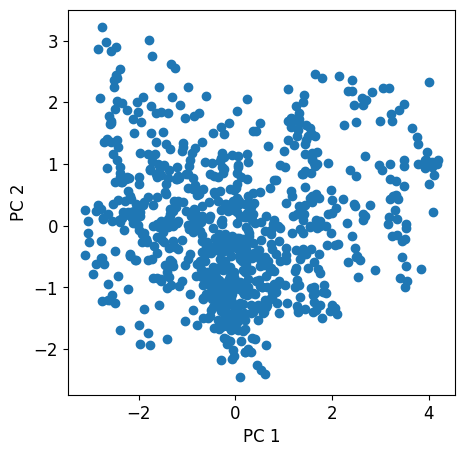

In [9]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
fig = plt.figure(figsize=(5, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1])

plt.xlabel("PC 1")
plt.ylabel("PC 2")

### Question 6 (1 pt) 
Pensez-vous utile d'utiliser cette ACP pour réduire la dimension des données pour construire un prédicteur de risque de grossesse difficile ?

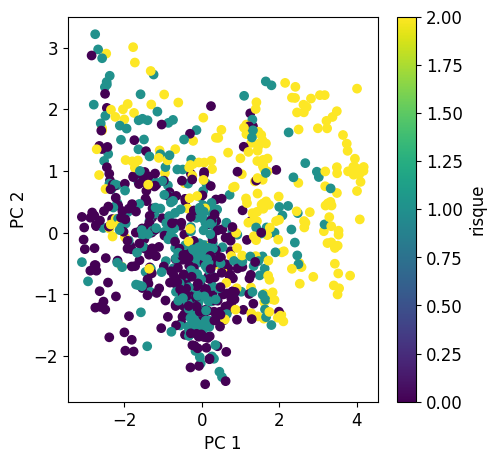

In [10]:
# Pour savoir cela, colorons la position des points selon le risque

fig = plt.figure(figsize=(5, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df_train['Risque'])

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='risque')

Il semblerait bien, d'après la figure ci-dessus, que la première composante principale donne une première idée du risque auxquel sont exposées les femmes enceintes, comme en témoigne la séparation horizontale des nuages de points bleu foncé et jaune. Cependant, cela ne semble pas suffisant puisque les nuages de points bleu clair et bleu foncé se recouvrent fortement, et qu'en réalité aucune zone n'est parfaitement définie.

### Question 7 (0,5 pt)
Affichez la matrice de corrélation entre les variables (étiquette exclue)

Text(0.5, 1.0, 'Corrélation entre les 6 variables')

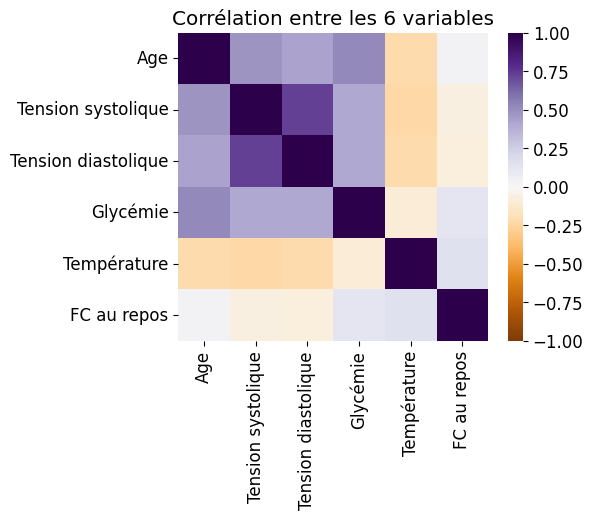

In [11]:
import scipy.stats as st
import seaborn as sns
# Calcul de la matrice de corrélation deux à deux
corr_matrix = df_train.drop(columns=['Risque']).corr()

# Initialisation figure
plt.figure(figsize=(5, 4))

# Affichage heatmap
sns.heatmap(corr_matrix, 
            vmin=-1, # borne inf des valeurs à afficher
            vmax=1, # borne sup des valeurs à afficher
            center= 0, # valeur médiane des valeurs à afficher,
            cmap='PuOr', # colormap divergente de violet (PUrple) vers orange (ORange)
           )
# Titre
plt.title("Corrélation entre les 6 variables")

### Question 8 (0,5 pt)

Comment utiliser cette matrice de corrélation pour réduire la dimension des données ?

Les cases avec des couleurs vives indiques une forte corrélation entre les deux variables à l'intersection des axes verticaux et horizontaux. On peut alors imaginer n'en garder qu'une des deux car la deuxième contient déjà beaucoup d'information que contient la première. Ainsi, on peut par exemple ne garder qu'une des deux tensions puisqu'elles ont une corrélation positive de plus de 0.75.

# 2. Classification «à risque» vs «sans risque»

Nous allons maintenant transformer les étiquettes en étiquettes binaire, en regroupant les risques obstétriques moyens et élevés. Les étiquettes `1` et `2` seront regroupées en une seule étiquette `1`.

In [12]:
# Copier le dataframe initial dans un nouveau dataframe 
df_train_risk_vs_norisk = df_train.copy()

# Regrouper les étiquettes 1 et 2
df_train_risk_vs_norisk['Risque'] = np.where(df_train['Risque']==2, 1, df_train['Risque'])

# Extraction de l'array d'étiquettes
y_train_risk_vs_norisk = np.array(df_train_risk_vs_norisk['Risque'], dtype='int')

df_train_risk_vs_norisk.head()
#print(y_train_risk_vs_norisk)

,Age,Tension systolique,Tension diastolique,Glycémie,Température,FC au repos,Risque
0,21.0,85.0,55.0,7.0,36.2,84.0,1
1,36.0,145.0,100.0,6.9,39.5,73.0,1
2,15.5,120.0,75.0,7.4,39.0,74.0,0
3,49.0,135.0,100.0,15.9,37.8,72.0,1
4,56.5,120.0,90.0,12.0,36.9,74.0,1


## Choix du critère d'évaluation
Pour cette section, on pourra se référer à la section 8.7.1 du poly.

### Question 9 (0,25 pt)
Quelle serait l'_accuracy_ (proportion d'observations correctement étiquetées) d'un modèle qui prédit que toutes les observations appartiennent à la classe majoritaire (c'est-à-dire la classe ayant le plus grand nombre d'observations dans les données) ? 

In [13]:
# Precision definie comme le nombre de vrai positif sur le nombre total de positifs
df_train_risk_vs_norisk['Risque'].value_counts()
# Risque
# 1    484
# 0    316
# Name: count, dtype: int64

Risque
1    484
0    316
Name: count, dtype: int64

L'accuracy serait donc de $\frac{484}{484+316}=0,605$

### Question 10 (0,25 pt) 
La __précision équilibrée__ (_balanced accuracy_) d'un classifieur binaire est donnée par :

$$BA = \frac12 \left( \frac{\text{TP}}{\text{TP}+\text{FN}} +  \frac{\text{TN}}{\text{TN}+\text{FP}} \right)$$

Expliquez pourquoi ce critère d'évaluation est plus pertinent que l'accuracy pour sélectionner un classifieur optimal.

Ce critère est pertinent dans des situations déséquilibrées (comme ici où on a 1,5 fois plus de risque 1 que de risque 0) puisqu'il tient compte des deux catégories à parts égales.

Dans la suite du projet, nous utiliserons ce critère, implémenté dans la méthode [metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) de scikit-learn.

## Plus proche voisin
L'algorithme du plus proche voisin associe à une observation $\vec{x}$ l’étiquette du point du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 11 (0,5 pt)
En quoi consiste la phase d'entraînement d'un tel classifieur ?

Cela consiste à attribuer formellement le risque à chaque observation.

### Question 12 (0,5 pt)
Quelle précision équilibrée attendez-vous _sur le jeu d'entraînement_ d'un algorithme du plus proche voisin ? Pourquoi ?

Une precision de 1 puisque l'algorithme a été entrainé avec le jeu d'entrainement et il n'y a donc ni faux positif, ni faux négatif.

### Question 13 (0,5 pt)
Vérifiez votre réponse sur les données, en utilisant la classe [neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

neigh = KNeighborsClassifier(n_neighbors=1)

X = np.array(df_train_risk_vs_norisk.drop(columns=['Risque']))
y = np.array(y_train_risk_vs_norisk, dtype='int')

# Normalisation
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# Split into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_scaled, y, test_size=None, random_state=42, stratify=y
)
# Stratify permet de s'assurer qu'on a une distribution de valeur similaire entre le jeu d'entrainement et de test

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
from sklearn.metrics import balanced_accuracy_score
y_pred = neigh.predict(X_train)
print(f"Test Accuracy (k=1): {balanced_accuracy_score(y_train, y_pred):.2f}")  # On obtient bien le resultat prevu

Test Accuracy (k=1): 1.00


### Quesion 14 (0,5 pt)
Pour cet algorithme, vaut-il mieux utiliser les données d'origine ou les données centrées-réduites ? Justifiez votre réponse.

Il est important d'utiliser les données centrées-réduites puisque le calcul des distances doit être normalisé.

## K plus proches voisins
L'algorithme des $K$ plus proche voisins associe à une observation $\vec{x}$ l’étiquette qui est majoritaires parmi celle des $K$ points du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 15 (1,5 pt)
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ (voir amphi 7 et PC5) pour déterminer une valeur optimale de $K$. 

* Justifiez votre choix de grille de valeurs.
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

1) On a 600 valeurs dont on va faire 10 folds donc on aura 540 valeurs d'entrainement pour 60 de test. Ainsi, le nombre de plus proche voisin à considérer de manière vraisemblable ne devrait pas dépasser 10% des valeurs d'entrainement soit 54 (on peut d'ailleurs vérifier cette hypothèse a posteriori en tracant pour K dans $[0, 100]$). Nous allons donc considérer pour K l'intervalle d'entiers $[1, 54]$. 

In [18]:
# instantier un objet KFold 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
# for i, (train_indices, val_indices) in enumerate(kf.split(X_train)):
#     print(f"fold: {i} : {len(train_indices)} observations pour l'entraînement et {len(val_indices)} pour la validation.")
    
# Définir la grille de valeurs de l'hyperparamètre K
K = np.array([i for i in range(1, 54)])

# Définir le modèle à tester
neigh = KNeighborsClassifier()

# Le score de performance le plus élevé est une precision equilibre la plus proche de 1 possible
# GridSearchCV cherche le K tel que le scoring est le plus élevé, on doit donc construire une fonction qui est maximale lorsque
# les performances sont les meilleures. La précision équilibrée sans modification marche alors parfaitement
ftwo_scorer = make_scorer(balanced_accuracy_score)

# Instantier la recherche sur grille
grid_neigh = model_selection.GridSearchCV(neigh, {'n_neighbors': K}, 
                                          cv=kf, 
                                          scoring=ftwo_scorer
                                         )

# Utiliser la recherche sur grille
grid_neigh.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'))

Best k from cross-validation: 4, with a balanced accuracy score of  0.74


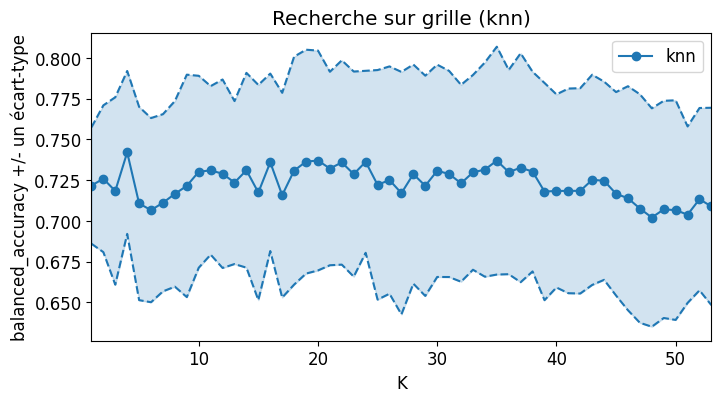

In [28]:
# Tracé
plt.figure(figsize=(8, 4))

moy_accuracy = grid_neigh.cv_results_['mean_test_score']
std_error = grid_neigh.cv_results_['std_test_score']
# print(grid_neigh.cv_results_.keys())

# affichage de l'accuracy moyenne :
plt.plot(grid_neigh.cv_results_['param_n_neighbors'], moy_accuracy, label="knn", color='tab:blue', marker='o')

plt.plot(grid_neigh.cv_results_['param_n_neighbors'], moy_accuracy + std_error, 
             color='tab:blue', linestyle='dashed')
plt.plot(grid_neigh.cv_results_['param_n_neighbors'], moy_accuracy - std_error, 
             color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(K, (moy_accuracy + std_error), (moy_accuracy - std_error), 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("K")
plt.ylabel("balanced_accuracy +/- un écart-type")
plt.xlim([K[0], K[-1]])
plt.title("Recherche sur grille (knn)")
plt.legend(loc='best')

best_K = grid_neigh.best_params_['n_neighbors']
print(f"Best k from cross-validation: {best_K}, with a balanced accuracy score of {grid_neigh.best_score_: .2f}")

Le graphique ci-dessus montre que la précision équilibrée maximale est atteinte en moyenne pour un nombre de plus proche voisin considéré égal à 4 pour une précision de $0.74$. <br> Au niveau des tendances, on augmente une augmentation de la précision jusqu'à atteindre un maximum assez net vers 4, puis une précision environ constante pour K entre 10 et 25, puis une décroissance de la précision. <br>
Au niveau des incertitudes, on remarque qu'elles ne permettent pas d'affirmer avec grande certitude que c'est effectivement la valeur qui donne la meilleure précision.

## 

## Régression logistique
Le pendant pour la classification binaire de la régression linéaire (amphi 7 et PC 5) est la __régression logistique__ (PC 6). Dans scikit-learn, elle est implémentée par la classe [linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Question 16 (1 pt) 
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ pour déterminer une valeur optimale du coefficient de régularisation d'une régression logistique. 

* Justifiez votre choix de type de régularisation et de grille de valeurs. 
* Illustrez par un graphique approprié votre exploration de cette grille. 
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

In [40]:
# instantier un objet KFold 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
# for i, (train_indices, val_indices) in enumerate(kf.split(X_train)):
#     print(f"fold: {i} : {len(train_indices)} observations pour l'entraînement et {len(val_indices)} pour la validation.")
    
# Définir la grille de valeurs de l'hyperparamètre K
c = np.array([0+0.02*i for i in range(0,51)])

# Définir le modèle à tester
logistic = LogisticRegression(random_state=42)

# Le score de performance le plus élevé est une precision equilibre la plus proche de 1 possible
# GridSearchCV cherche le K tel que le scoring est le plus élevé, on doit donc construire une fonction qui est maximale lorsque
# les performances sont les meilleures. La précision équilibrée sans modification marche alors parfaitement
ftwo_scorer = make_scorer(balanced_accuracy_score)

# Instantier la recherche sur grille
grid_logistic = model_selection.GridSearchCV(logistic, {'C': c}, 
                                          cv=kf, 
                                          scoring=ftwo_scorer
                                         )

# Utiliser la recherche sur grille
grid_logistic.fit(X_train, y_train)

C:\miniconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\miniconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\miniconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\miniconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\miniconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'))

ValueError: operands could not be broadcast together with shapes (53,) (51,) 

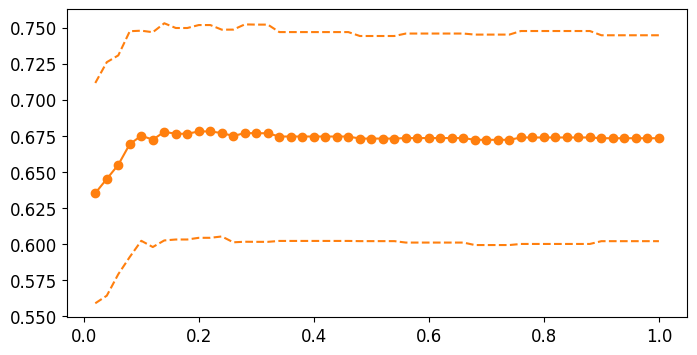

In [41]:
# Tracé
plt.figure(figsize=(8, 4))

moy_accuracy = grid_logistic.cv_results_['mean_test_score']
std_error = grid_logistic.cv_results_['std_test_score']
# print(grid_logistic.cv_results_.keys())
# print(grid_logistic.cv_results_['param_C'])
# print(moy_accuracy, std_error)
# affichage de l'accuracy moyenne :
plt.plot(grid_logistic.cv_results_['param_C'], moy_accuracy, label="regression logistique", color='tab:orange', marker='o')

plt.plot(grid_logistic.cv_results_['param_C'], moy_accuracy + std_error, 
             color='tab:orange', linestyle='dashed')
plt.plot(grid_logistic.cv_results_['param_C'], moy_accuracy - std_error, 
             color='tab:orange', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(K, (moy_accuracy + std_error), (moy_accuracy - std_error), 
                 color='tab:orange',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("C")
plt.ylabel("balanced_accuracy +/- un écart-type")
plt.xlim([c[0], c[-1]])
plt.title("Recherche sur grille (knn)")
plt.legend(loc='best')

best_c = grid_logistic.best_params_['param_C']
print(f"Best k from cross-validation: {best_c}, with a balanced accuracy score of {grid_logistic.best_score_: .2f}")

## Algorithme non-linéaire

### Question 17 (2pt)
Choisissez maintenant un algorithme permettant d'apprendre un modèle non-linéaire parmi ceux du chapitre 9 :
* arbre de décision : [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* forêt aléatoire : [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* machine à vecteur de support à noyau : [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* perceptron multi-couche : [neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Utilisez encore une fois une recherche sur grille avec une validation croisée en 10 _folds_ pour sélectionner le(s) hyperparamètre(s) le(s) plus pertinent(s).

* Justifiez votre choix d'hyperparamètre(s) à optimiser.
* Justifiez votre choix de grille de valeurs pour ces ou cet hyperparèmtre(s).
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la ou les valeur(s) optimale(s) d'hyperparamètre(s) et la précision équilibrée correspondante.

## Classification après réduction de dimension

Nous allons maintenant évaluer l'impact d'une réduction de dimension sur la qualité de l'apprentissage.

### Question 18 (0,25 pt)
Quel algorithme (k plus proches voisins ; régression logistique ; algorithme non-linéaire de la question 16) vous a permis d'obtenir la meilleure performance ? 

### Quesion 19 (0,25 pt)
Utilisez le travail des questions 4 à 7 pour créer une nouvelle matrice représentant les données dans moins de dimensions qu'originellement. 

### Question 20 (0,25 pt)
Utilisez encore une fois une recherche sur grille pour optimiser les performances de cet algorithme, mais entrainé sur cette nouvelle matrice. 

### Question 21 (0,25 pt)
La réduction de dimension a-t-elle été utile ? Commentez.

## Classifieur final

### Question 22 (0,25 pt)
Au vu des performances observées jusqu'à présent, quel est l'algorithme d'apprentissage, son ou ses valeurs d'hyperparamètres, la transformation des données qui permettent d'obtenir la meilleure performance ? 

Utilisez cet algorithme pour entraîner un modèle de classification final `final_binary_classifier` sur l'ensemble du jeu d'entraînement.

### Question 23 (0,25 pt)

Chargez les données du jeu de test `data/donnees_reservees.csv`. Combinez les étiquettes 1 et 2 en une seule classe. 

### Question 24 (0,25 pt)

Utilisez `final_binary_classifier` pour prédire les étiquettes des observations de ce jeu de données. (N'oubliez pas d'appliquer d'éventuelles transformation des données.) 

### Question 25 (0,5 pt)
Comparez la précision équilibrée sur le jeu de test à celle obtenue en validation croisée lors de la sélection de modèle. Commentez.

### Question 26 (0,25 pt)
Utilisez [metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) pour afficher la matrice de confusion de ces prédictions.

### Question 27 (0,5 pt)
Commentez cette matrice de précision.

Considéreriez vous possible d'utilise ce classifieur pour décider, sur la base de ces quelques mesures faciles à obtenir en autonomie, quelles femmes référer pour un suivi médical attentif de leur grossesse ?

# 3. Classification multi-classe

### Question 28 (0,5 pt)
Parmi les algorithmes d'apprentissage supervisé que vous avez utilisé dans la section 2, le(s)quel(s) se prête(nt) directement à entraîner un classifieur multiclasse ?

### Question 29 (1,5 pt)
Choisissez un des algorithmes mentionnés à la question précédente et entraînez-le sur le problème de classification multi-classe consistant à prédire le niveau (0, 1 ou 2) de risque obstétrique. Optimisez le ou les hyperparamètre(s) le(s) plus pertinent(s).

### Question 30 (1pt)
Utilisez cet algorithme pour entraîner un modèle multi-classe final sur l'ensemble des données d'entraînement. Évaluez ce modèle sur les données de test. Commentez.